<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-первичный-анализ" data-toc-modified-id="Загрузка-данных-и-первичный-анализ-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных и первичный анализ</a></span></li><li><span><a href="#Ресемплирование" data-toc-modified-id="Ресемплирование-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ресемплирование</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Создание-функций-и-переменных" data-toc-modified-id="Создание-функций-и-переменных-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Создание функций и переменных</a></span></li><li><span><a href="#Поиск-оптимального-количества-новых-признаков" data-toc-modified-id="Поиск-оптимального-количества-новых-признаков-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Поиск оптимального количества новых признаков</a></span></li><li><span><a href="#Создание-новых-признаков" data-toc-modified-id="Создание-новых-признаков-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Создание новых признаков</a></span></li><li><span><a href="#Разделение-данных" data-toc-modified-id="Разделение-данных-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Разделение данных</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>RandomForest</a></span></li><li><span><a href="#LGBM" data-toc-modified-id="LGBM-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>LGBM</a></span></li><li><span><a href="#Константная-модель" data-toc-modified-id="Константная-модель-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Константная модель</a></span></li><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Выбор лучшей модели</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

### Загрузка данных и первичный анализ

Импорт библиотек

In [1]:
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import (train_test_split,
                                       GridSearchCV,
                                       cross_val_score,
                                       TimeSeriesSplit)


Сохраняем данные в переменную `taxi`. В качестве индекса указываем колонку `datetime`

In [2]:
taxi = pd.read_csv('/datasets/taxi.csv', index_col='datetime')
taxi

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


Изменим тип данных индекса на `datetime`

In [3]:
taxi.index = pd.to_datetime(taxi.index)

Проверим хронологический порядок индекса

In [4]:
taxi.index.is_monotonic

True

In [5]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [6]:
taxi.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


В данных нет пропусков, индексы идут в хронологическом порядке(от 2018-03-01 00:00, до 2018-08-31 23:50), тип данных соответствует содержимому. Также в данных отсутствуют аномальные значения. Минимальное значение количества заказов равно 0 (вполне реально в 10 минутном интервале). Максимальное значение 119.

### Ресемплирование 

Временной промежуток данных 10 минут. Проведем ресемплирование по одному часу и просуммируем количество заказов

In [7]:
taxi = taxi.resample('1H').sum()

In [8]:
taxi

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


После ресемплирования количество строчек (очевидно) сократилось до 4416

Проведена подготовка данных и первичный анализ. Также проведено ресемплирование. Переходим к следующему пункту

## Анализ

Воспользуемся `seasonal_decompose` для анализа тренда данных и сезонностей 

In [9]:
decomposed = seasonal_decompose(taxi)

<AxesSubplot:xlabel='datetime'>

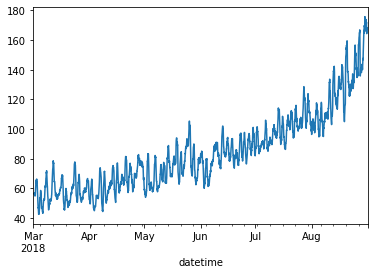

In [10]:
decomposed.trend.plot()

Восходящий тренд говорит нам об увеличении количества заказов со временем

Оценим сезонность данных в отрезке одного месяца

<AxesSubplot:xlabel='datetime'>

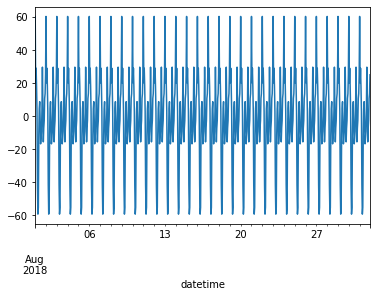

In [11]:
decomposed.seasonal['2018-08-01': '2018-08-31'].plot()

На протяжении всего месяца график цикличный

Посмотрим на график с отрезком в один день 

<AxesSubplot:xlabel='datetime'>

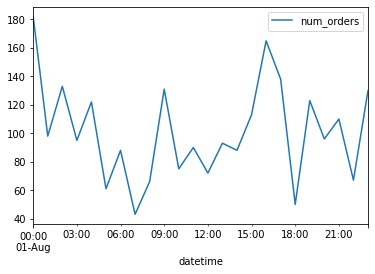

In [12]:
taxi['2018-08-01': '2018-08-01'].plot()

Количество заказов сильно зависит от времени суток 

Исходя из полученных при анализе данных для построения будущей модели необходимо будет добавить следующие признаки:
- время суток (количество заказов сильно меняется от времени суток)
- день недели 

In [13]:
taxi['hour'] = taxi.index.hour
taxi['dayofweek'] = taxi.index.dayofweek

Исходя из результатов анализа было добавлено три новых признака. Переходим к следующему этапу

## Обучение

### Подготовка 

#### Создание функций и переменных

Для оценки качества модели создадим функцию `rmse` 

In [14]:
def rmse(target, predict):
    return mean_squared_error(target, predict) ** 0.5

Также создадим переменную `scorer` для кросс-валидации и гридсерча внутри которой будем использовать `rmse`

In [15]:
scorer = make_scorer(rmse, greater_is_better=False)

Создадим функцию для создания дополнительных признаков `make_features` который принимает в себя:
- датафрейм
- целевой признак
- max_lag
- rolling_mean_size

И возвращает нам новый датафрейм с добавленными признаками

In [16]:
def make_features(data, target_column, max_lag, rolling_mean_size):
    
    for lag in range(1, max_lag + 1):
        data['lag_' + str(lag)] = data[target_column].shift(lag)

    data['rolling_mean'] = data[target_column].shift().rolling(rolling_mean_size).mean()
    
    data.dropna(inplace=True)
    
    return data

Также создадим функцию `best_features` которая будет в себе использовать функцию `make_features` и возвращать нам данные кросс-валидации линейной регрессии на обучающей выборке (а именно RMSE и текущие параметры lag и rolling_mean). Исходя из полученных данных будет ясно какие лучше использовать `max_lag` и `rolling_mean_size`

In [17]:
def best_features(df, target_column, max_lag, rolling_mean_size):
    data = df.copy()
    
    data = make_features(data, target_column, max_lag, rolling_mean_size)
    
    f = data.drop([target_column], axis=1)
    t = data[target_column]
    
    f_train, f_test, t_train, t_test = train_test_split(f, t, 
                                                    shuffle=False, test_size=0.1)
    
    lr_model = LinearRegression()
    scores = cross_val_score(lr_model, f_train, t_train, cv=TimeSeriesSplit(n_splits=8), scoring=scorer)
    
    
    print(f'Среднее RMSE: {scores.mean():.2f} | max_lag: {max_lag} | rolling_mean_size: {rolling_mean_size}')

#### Поиск оптимального количества новых признаков

Запустим вложенный цикл который будет подбирать нам оптимальные параметры

In [18]:
for lag in [5, 10, 15, 20, 25, 30, 35, 40]:
    for roll_size in [10, 20, 30, 40, 50, 60, 70, 80]:
        best_features(taxi, 'num_orders', lag, roll_size)

Среднее RMSE: -32.09 | max_lag: 5 | rolling_mean_size: 10
Среднее RMSE: -32.21 | max_lag: 5 | rolling_mean_size: 20
Среднее RMSE: -31.51 | max_lag: 5 | rolling_mean_size: 30
Среднее RMSE: -31.70 | max_lag: 5 | rolling_mean_size: 40
Среднее RMSE: -31.25 | max_lag: 5 | rolling_mean_size: 50
Среднее RMSE: -31.39 | max_lag: 5 | rolling_mean_size: 60
Среднее RMSE: -31.57 | max_lag: 5 | rolling_mean_size: 70
Среднее RMSE: -31.32 | max_lag: 5 | rolling_mean_size: 80
Среднее RMSE: -31.94 | max_lag: 10 | rolling_mean_size: 10
Среднее RMSE: -32.04 | max_lag: 10 | rolling_mean_size: 20
Среднее RMSE: -31.33 | max_lag: 10 | rolling_mean_size: 30
Среднее RMSE: -31.56 | max_lag: 10 | rolling_mean_size: 40
Среднее RMSE: -31.08 | max_lag: 10 | rolling_mean_size: 50
Среднее RMSE: -31.22 | max_lag: 10 | rolling_mean_size: 60
Среднее RMSE: -31.43 | max_lag: 10 | rolling_mean_size: 70
Среднее RMSE: -31.17 | max_lag: 10 | rolling_mean_size: 80
Среднее RMSE: -31.58 | max_lag: 15 | rolling_mean_size: 10
Средн

По результатам видно что лучшее среднее RMSE в 25,68 при кросс-валидации на линейной регрессии получаются при параметрах `max_lag: 40` и `rolling_mean_size: 50`

#### Создание новых признаков

Воспользуемся функцией `make_features` с этими параметрами 

In [19]:
new_taxi = make_features(taxi, 'num_orders', 40, 50)

In [20]:
new_taxi

,num_orders,hour,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_32,lag_33,lag_34,lag_35,lag_36,lag_37,lag_38,lag_39,lag_40,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-03 02:00:00,25,2,5,108.0,163.0,72.0,119.0,101.0,93.0,49.0,...,73.0,44.0,43.0,66.0,48.0,32.0,30.0,96.0,64.0,62.82
2018-03-03 03:00:00,64,3,5,25.0,108.0,163.0,72.0,119.0,101.0,93.0,...,45.0,73.0,44.0,43.0,66.0,48.0,32.0,30.0,96.0,60.84
2018-03-03 04:00:00,44,4,5,64.0,25.0,108.0,163.0,72.0,119.0,101.0,...,61.0,45.0,73.0,44.0,43.0,66.0,48.0,32.0,30.0,60.42
2018-03-03 05:00:00,15,5,5,44.0,64.0,25.0,108.0,163.0,72.0,119.0,...,66.0,61.0,45.0,73.0,44.0,43.0,66.0,48.0,32.0,59.88
2018-03-03 06:00:00,9,6,5,15.0,44.0,64.0,25.0,108.0,163.0,72.0,...,113.0,66.0,61.0,45.0,73.0,44.0,43.0,66.0,48.0,58.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,136,19,4,207.0,217.0,197.0,116.0,133.0,166.0,136.0,...,156.0,227.0,226.0,166.0,39.0,13.0,56.0,186.0,193.0,169.64
2018-08-31 20:00:00,154,20,4,136.0,207.0,217.0,197.0,116.0,133.0,166.0,...,173.0,156.0,227.0,226.0,166.0,39.0,13.0,56.0,186.0,169.18
2018-08-31 21:00:00,159,21,4,154.0,136.0,207.0,217.0,197.0,116.0,133.0,...,154.0,173.0,156.0,227.0,226.0,166.0,39.0,13.0,56.0,169.86


#### Разделение данных 

Разделим данные на признаки и целевой признак

In [21]:
f = new_taxi.drop(['num_orders'], axis=1)
t = new_taxi['num_orders']

Создадим обучающую и тестовую выборки в соотношении **9:1**

In [22]:
f_train, f_test, t_train, t_test = train_test_split(f, t, 
                                                    shuffle=False, test_size=0.1)

In [23]:
print(f_train.shape, t_train.shape)
print(f_test.shape, t_test.shape)

(3929, 43) (3929,)
(437, 43) (437,)


Данные полностью подготовлены. Создано оптимальное количество дополнительных признаков. Данные разделены. Переходим к обучению

### Обучение моделей 

#### CatBoost

Запишем модель в переменную и выберем параметры для гридсерча

In [24]:
cat_model = CatBoostRegressor(random_state=333, verbose=False)

param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'iterations': [150, 200, 250]
}

Приступим к поиску параметров 

In [25]:
%%time
grid_search = GridSearchCV(cat_model, param_grid=param_grid, scoring=scorer, cv=TimeSeriesSplit(n_splits=8))
grid_search.fit(f_train, t_train)

CPU times: user 1min 44s, sys: 1.52 s, total: 1min 45s
Wall time: 2min 19s


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=8, test_size=None),
             estimator=<catboost.core.CatBoostRegressor object at 0x7fe88024b460>,
             param_grid={'iterations': [150, 200, 250],
                         'learning_rate': [0.1, 0.2, 0.3]},
             scoring=make_scorer(rmse, greater_is_better=False))

Поиск параметров занял где-то полторы минуты.
Посмотрим на лучшие параметры

In [26]:
print(grid_search.best_params_)
print()
print(f'Среднее RMSE CatBoost при кросс-валидации: {abs(grid_search.best_score_):.2f}')

{'iterations': 250, 'learning_rate': 0.1}

Среднее RMSE CatBoost при кросс-валидации: 23.91


Сохраним параметры в переменную `best_cat_model`

In [27]:
best_cat_model = CatBoostRegressor(random_state=333, verbose=False, iterations=250, learning_rate=0.1)

#### RandomForest

Таким же образом создадим модель `RandomForest`. Создадим словарь с параметрами и запустим гридсерч для поиска лучших параметров

In [28]:
rf_model = RandomForestRegressor(random_state=333)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
}

In [29]:
%%time
grid_search = GridSearchCV(rf_model, param_grid=param_grid, scoring=scorer, cv=TimeSeriesSplit(n_splits=8))
grid_search.fit(f_train, t_train)

CPU times: user 4min 2s, sys: 800 ms, total: 4min 3s
Wall time: 4min 4s


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=8, test_size=None),
             estimator=RandomForestRegressor(random_state=333),
             param_grid={'max_depth': [5, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring=make_scorer(rmse, greater_is_better=False))

In [30]:
print(grid_search.best_params_)
print()
print(f'Среднее RMSE RandomForest при кросс-валидации: {abs(grid_search.best_score_):.2f}')

{'max_depth': 20, 'n_estimators': 200}

Среднее RMSE RandomForest при кросс-валидации: 24.52


Гридсерч случайного леса занял больше 4 минут. Среднее RMSE: 24.52

#### LGBM

In [31]:
lgb_model = lgb.LGBMRegressor(random_state=333)

param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

In [32]:
%%time
grid_search = GridSearchCV(lgb_model, param_grid=param_grid, scoring=scorer, cv=TimeSeriesSplit(n_splits=8))
grid_search.fit(f_train, t_train)

CPU times: user 4min 2s, sys: 5.61 s, total: 4min 8s
Wall time: 4min 11s


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=8, test_size=None),
             estimator=LGBMRegressor(random_state=333),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'n_estimators': [50, 100, 200]},
             scoring=make_scorer(rmse, greater_is_better=False))

In [33]:
print(grid_search.best_params_)
print()
print(f'Среднее RMSE LGBM при кросс-валидации: {abs(grid_search.best_score_):.2f}')

{'learning_rate': 0.05, 'n_estimators': 200}

Среднее RMSE LGBM при кросс-валидации: 24.37


Подбор гиперпараметров занял более 4 минут. Среднее значение RMSE: 24.37

#### Константная модель

In [34]:
const_model = pd.Series(t_test.mean(), index=t_test.index)
print(f'RMSE константной модели: {rmse(t_test, const_model):.2f}')

RMSE константной модели: 58.80


#### Выбор лучшей модели 

In [35]:
d = {'Время подбора параметров (мин:сек)':['1:30', '4:00', '10:00', '0'],
    'RMSE':[23.91, 24.52, 24.37, 58.80]}

data = pd.DataFrame(d, index=['CatBoost', 'RandomForest', 'LGBM', 'Константная модель'])
data

,Время подбора параметров (мин:сек),RMSE
CatBoost,1:30,23.91
RandomForest,4:00,24.52
LGBM,10:00,24.37
Константная модель,0,58.80


Средние показатели RMSE при кросс-валидации у всех моделей близки друг к другу. Время подбора параметров как и RMSE лучше у **CatBoost**.

На ней и будем проводить итоговое тестирование 

## Тестирование

In [36]:
best_cat_model.fit(f_train, t_train)

In [37]:
pred = best_cat_model.predict(f_test)
print(f'RMSE на тестовой выборке: {rmse(t_test, pred):.2f}')

RMSE на тестовой выборке: 43.31


Для наглядной оценки качества предсказания модели построим график за последние 72 часа тестовой выборки и сравним реальные значения с предсказанными

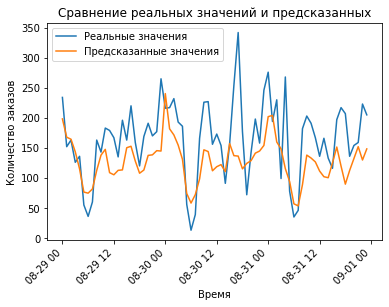

In [38]:
plt.plot(t_test[-72:].index, t_test[-72:], label='Реальные значения')
plt.plot(t_test[-72:].index, pred[-72:], label='Предсказанные значения')

plt.xlabel('Время')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Количество заказов')
plt.title('Сравнение реальных значений и предсказанных')
plt.legend()

plt.show()

Предсказания почти дублируют направления роста или падения реальных значений заказов с небольшим отклонением. Хуже всего модель отреагировала на резкий пик спроса 

# Вывод

1. **Подготовка**
- данные были загружены и проанализированы
- проведено ресемплирование

2. **Анализ**
- были проанализированы тренды и сезонности временного ряда
- добавлены новые признаки `hour` `month` `dayofweek`

3. **Обучение**
- подобрано и добавлено оптимальное количество новых признаков `lag` и `rolling_mean`
- были обучены три модели с подбором параметров и кросс-валидацией
- выбрана лучшая модель `CatBoost с RMSE 23.91`

4. **Тестирование**

Во время проведения итогового тестирования мы сравнили нашу модель с константной.
RMSE константной модели составила 58.80.

RMSE нашей модели на тестовой выборке составила **43.31**